In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline

Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [299]:
data = pd.read_csv('telco_churn.csv')

In [300]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [301]:
data.shape

(7043, 21)

In [302]:
pd.isnull(data).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [304]:
#TotalCharges cannot be converted to float with pd.to_numeric or .astype(float)
data.TotalCharges.value_counts()
#It seems to be due to the fact that there are 11 rows with ' ' as TotalCharges

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
6683.4      1
146.6       1
357.75      1
1988.05     1
2192.9      1
Name: TotalCharges, Length: 6531, dtype: int64

In [305]:
data[data.TotalCharges == ' ']
#They all have tenure = 0, i.e. they are new customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [306]:
data[data.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [307]:
#Assuming all new customers have to pay for the first month, even if they cancel within one month of subscription
#We change these tenure to 1, and TotalCharges = MonthlyCharges
data.loc[(data.tenure == 0), 'TotalCharges'] = data.loc[(data.tenure == 0), 'MonthlyCharges']

In [308]:
data.loc[:, 'tenure'].replace(to_replace = 0, value = 1, inplace = True)

In [309]:
data[data.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [310]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [312]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.372710,64.761692,2279.798992
std,0.368612,24.557454,30.090047,2266.730170
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [313]:
#EDA

In [314]:
churn_breakdown = data['Churn'].value_counts().to_frame()
churn_breakdown

,Churn
No,5174
Yes,1869


Text(0.5, 1.0, 'Churn breakdown')

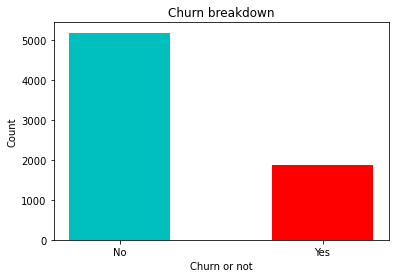

In [315]:
plt.bar(churn_breakdown.index, churn_breakdown['Churn'], width = 0.5, color = ['c', 'r'])
plt.xlabel('Churn or not')
plt.ylabel('Count')
plt.title('Churn breakdown')

1869 (26.54%) customers churned.

In [316]:
churn_by_gender = (data.groupby('gender')["Churn"].value_counts()/len(data)*100).unstack()



(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

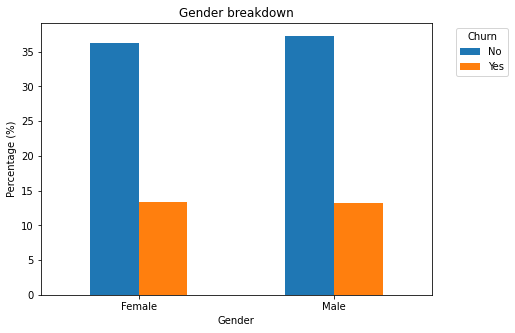

In [317]:
churn_by_gender.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Gender breakdown')
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

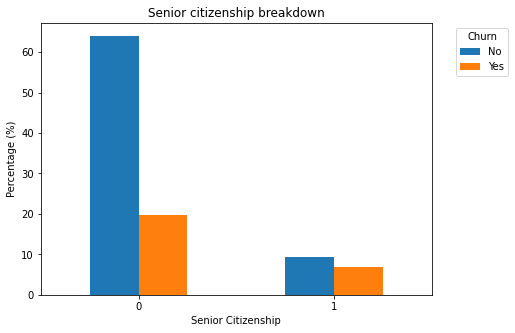

In [318]:
churn_by_senior = (data.groupby('SeniorCitizen')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_senior.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Senior Citizenship')
plt.ylabel('Percentage (%)')
plt.title('Senior citizenship breakdown')
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

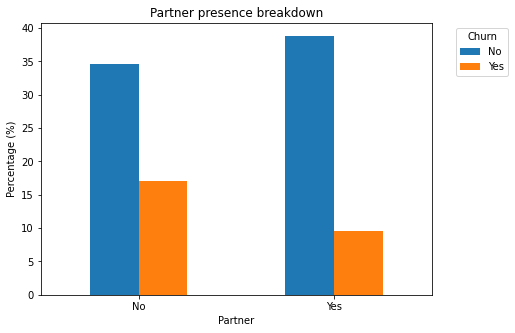

In [319]:
churn_by_partner = (data.groupby('Partner')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_partner.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Partner')
plt.ylabel('Percentage (%)')
plt.title('Partner presence breakdown')
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

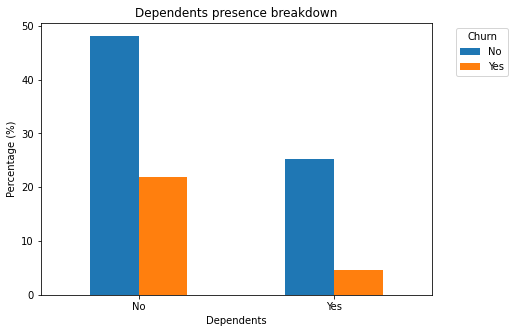

In [320]:
churn_by_dependents = (data.groupby('Dependents')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_dependents.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Dependents')
plt.ylabel('Percentage (%)')
plt.title('Dependents presence breakdown')
plt.xticks(rotation = 0)

**Churn rate seems to be uncorrelated to gender. Senior citizens are
much more likely to churn. Customers with partners are somewhat less
likely to churn. Customers with dependents are also less likely to
churn.**

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

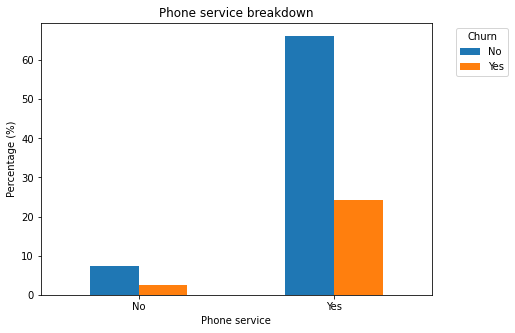

In [321]:
churn_by_phoneservice = (data.groupby('PhoneService')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_phoneservice.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Phone service')
plt.ylabel('Percentage (%)')
plt.title('Phone service breakdown')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No phone service')])

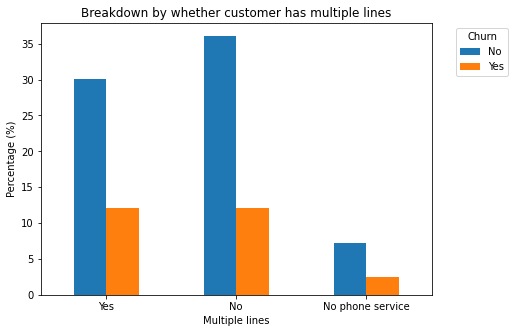

In [322]:
churn_by_multiplelines = (data.groupby('MultipleLines')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_multiplelines = churn_by_multiplelines.reindex(['Yes', 'No', 'No phone service'])

churn_by_multiplelines.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Multiple lines')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has multiple lines')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

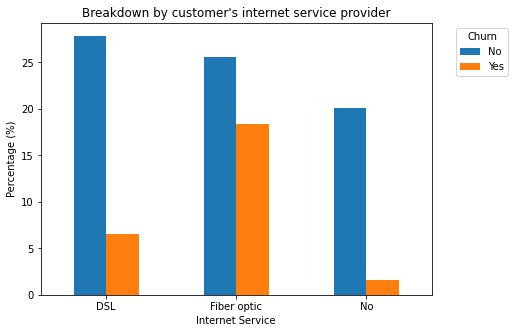

In [323]:
churn_by_internet = (data.groupby('InternetService')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_internet.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Internet Service')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by customer\'s internet service provider')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

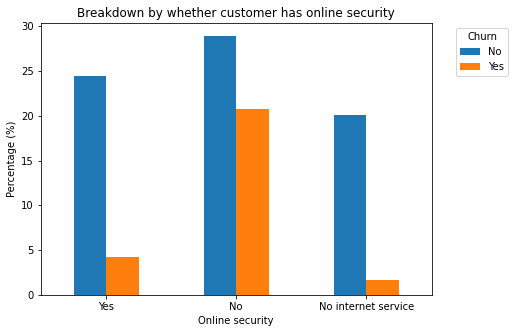

In [324]:
churn_by_onlinesec = (data.groupby('OnlineSecurity')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_onlinesec = churn_by_onlinesec.reindex(['Yes', 'No', 'No internet service'])

churn_by_onlinesec.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Online security')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has online security')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

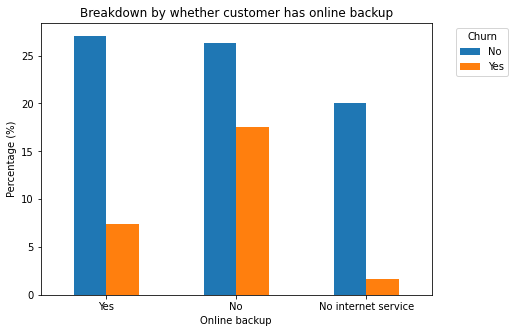

In [325]:
churn_by_onlinebu = (data.groupby('OnlineBackup')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_onlinebu = churn_by_onlinebu.reindex(['Yes', 'No', 'No internet service'])

churn_by_onlinebu.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Online backup')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has online backup')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

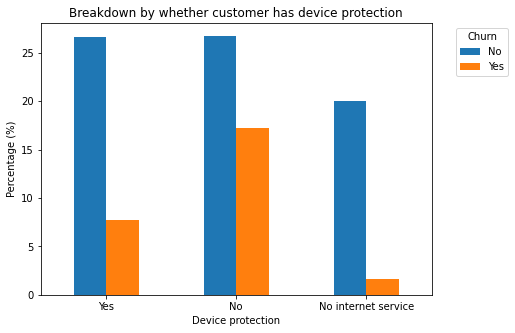

In [326]:
churn_by_devprot = (data.groupby('DeviceProtection')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_devprot = churn_by_devprot.reindex(['Yes', 'No', 'No internet service'])

churn_by_devprot.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Device protection')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has device protection')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

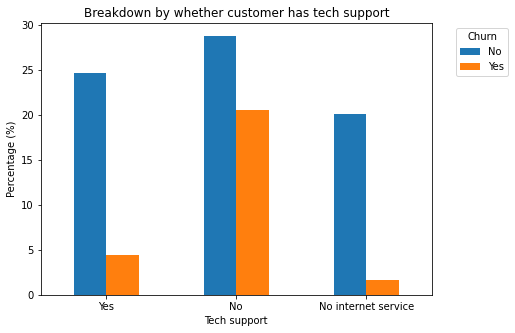

In [327]:
churn_by_techsup = (data.groupby('TechSupport')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_techsup = churn_by_techsup.reindex(['Yes', 'No', 'No internet service'])

churn_by_techsup.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Tech support')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has tech support')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

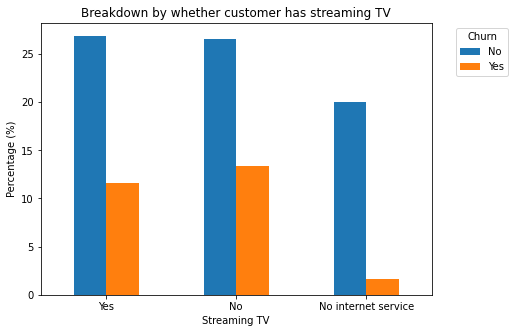

In [328]:
churn_by_streamtv = (data.groupby('StreamingTV')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_streamtv = churn_by_streamtv.reindex(['Yes', 'No', 'No internet service'])

churn_by_streamtv.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Streaming TV')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has streaming TV')
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

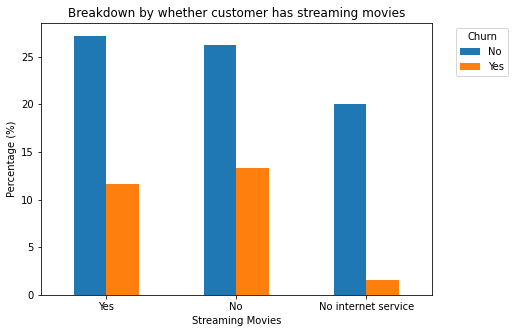

In [329]:
churn_by_streammov = (data.groupby('StreamingMovies')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_streammov = churn_by_streammov.reindex(['Yes', 'No', 'No internet service'])

churn_by_streammov.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Streaming Movies')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has streaming movies')
plt.xticks(rotation = 0)

**Customers who have no online security, online backup, device protection, tech support, streaming TV, streaming movies have a higher churn rate than those who have. Customers who subscribed for these extra services have a lower churn rate. Tech support seems to render the highest difference.**

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

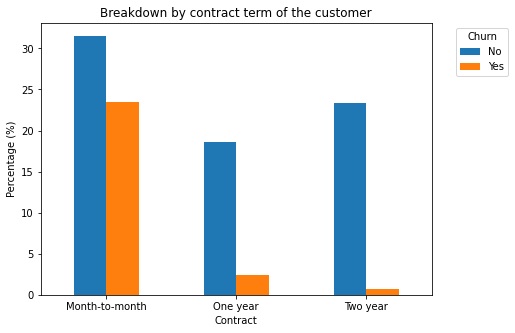

In [330]:
churn_by_contract = (data.groupby('Contract')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_contract.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Contract')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by contract term of the customer')
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

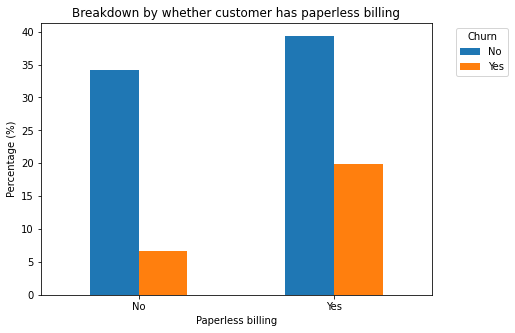

In [331]:
churn_by_paperlessbill = (data.groupby('PaperlessBilling')["Churn"].value_counts()/len(data)*100).unstack()

churn_by_paperlessbill.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Paperless billing')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by whether customer has paperless billing')
plt.xticks(rotation = 0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

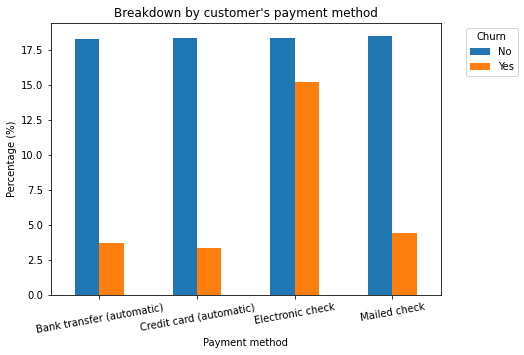

In [332]:
churn_by_paymethod = (data.groupby('PaymentMethod')["Churn"].value_counts()/len(data)*100).unstack()

#churn_by_paymethod.index = ['\n'.join(wrap(x, 12)) for x in  churn_by_paymethod.index]

churn_by_paymethod.plot.bar(figsize = (7,5))
plt.legend(title = 'Churn', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xlabel('Payment method')
plt.ylabel('Percentage (%)')
plt.title('Breakdown by customer\'s payment method')
plt.xticks(rotation = 10)

**Customers who pay monthly have a higher churn rate than those who pay 
annually, those who pay biannually have the lowest churn rate. Those
who have paperless billing have a higher churn rate. Those who pay
by electronic check have the highest churn rate.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


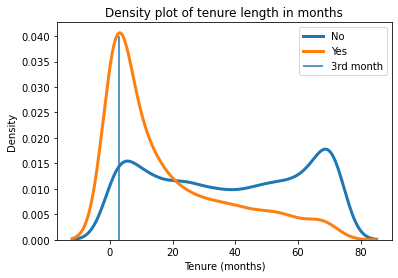

In [466]:
for churn in ['No', 'Yes']:
    subset = data[data['Churn'] == churn]
    sns.distplot(subset['tenure'], hist = False, kde = True, 
                 kde_kws = {'linewidth':3}, label = churn)

plt.legend(title='Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.title('Density plot of tenure length in months')
plt.vlines(x=3, ymin = 0, ymax = 0.040, label = '3rd month')
plt.legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density plot of monthly charges')

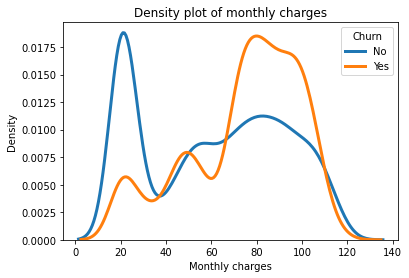

In [334]:
for churn in ['No', 'Yes']:
    subset = data[data['Churn'] == churn]
    sns.distplot(subset['MonthlyCharges'], hist = False, kde = True, 
                 kde_kws = {'linewidth':3}, label = churn)

plt.legend(title='Churn')
plt.xlabel('Monthly charges')
plt.ylabel('Density')
plt.title('Density plot of monthly charges')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density plot of total charges')

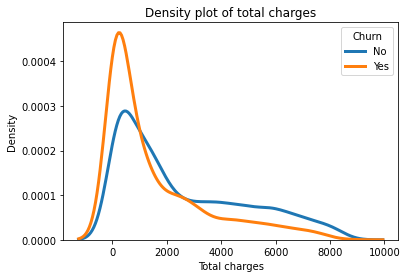

In [335]:
for churn in ['No', 'Yes']:
    subset = data[data['Churn'] == churn]
    sns.distplot(subset['TotalCharges'], hist = False, kde = True, 
                 kde_kws = {'linewidth':3}, label = churn)

plt.legend(title='Churn')
plt.xlabel('Total charges')
plt.ylabel('Density')
plt.title('Density plot of total charges')

**Newer customers have a much higher churn rate. The longer the customer is retained for, the less likely they will unsubscribe. After 3 months, chun rate starts to become smaller than retention rate. Customers charged more highly are more likely to churn, monthly charge of around 70-110 (unknown currency) would lead to higher churn rate than retention rate. In the long term, as customers spend more and more, the churn rate also becomes smaller.**

In summary, customers who have a higher churn rate have the following characteristics:

-Senior citizens

-No partners

-No dependents

-Have not subscribed for extra services, including: online security, online backup, device protection, tech support, streaming TV, streaming movies

-Monthly payment

-Paperless billing

-Payment via electronic check

-New customer (<3 months)

-Monthly charge between 70-110

In [336]:
#drop customerID
#factorise
#dummy
#correlation
#feature selection

customerID = data['customerID']
data.drop(['customerID'], axis=1, inplace=True)

In [337]:
categories = [c for c in data.columns if data[c].dtype == 'object' or c == 'SeniorCitizen']
cat_df = data[categories].copy()
cat_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [338]:
for column in categories:
    if cat_df[column].nunique() == 2:
        print(column)

gender
SeniorCitizen
Partner
Dependents
PhoneService
PaperlessBilling
Churn


In [339]:
cat_df.Partner = cat_df.Partner.map(dict(Yes=1, No=0))

In [340]:
cat_df.gender = cat_df.gender.map(dict(Male=1, Female=0))
cat_df.Dependents = cat_df.Dependents.map(dict(Yes=1, No=0))
cat_df.PhoneService = cat_df.PhoneService.map(dict(Yes=1, No=0))
cat_df.PaperlessBilling = cat_df.PaperlessBilling.map(dict(Yes=1, No=0))
cat_df.Churn = cat_df.Churn.map(dict(Yes=1, No=0))

In [341]:
cat_df.rename(columns = {'gender':'gender=Male', 'Partner':'HasPartner', 'Dependents':'HasDependents'})
cat_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,0
1,1,0,0,0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,0
2,1,0,0,0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,1
3,1,0,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),0
4,0,0,0,0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,1


In [342]:
for column in categories:
    if cat_df[column].nunique() != 2:
        cat_df = pd.get_dummies(cat_df, columns=[column])

In [343]:
cat_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [344]:
cat_df['tenure'] = data[['tenure']]
cat_df['MonthlyCharges'] = data[['MonthlyCharges']]
cat_df['TotalCharges'] = data[['TotalCharges']]

<AxesSubplot:>

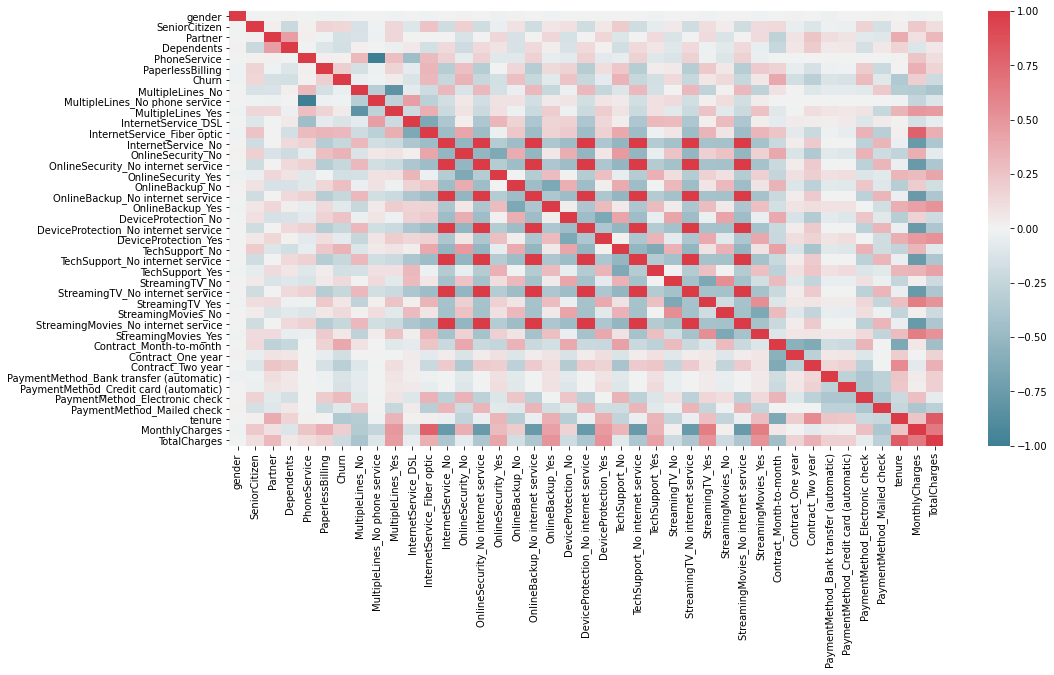

In [345]:
#plt.figure(figsize=(16,8))
plt.figure(figsize=(16,8))
corr = cat_df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))

**Each service is highly correlated to other services, i.e. customers who subscribed for one service are also likely to subscribe for other services. As expected, total charges is also highly and positively correlated to extra services subscribed. InternetService_No is very highly correlated with all the services_no internet service columns.**

<AxesSubplot:>

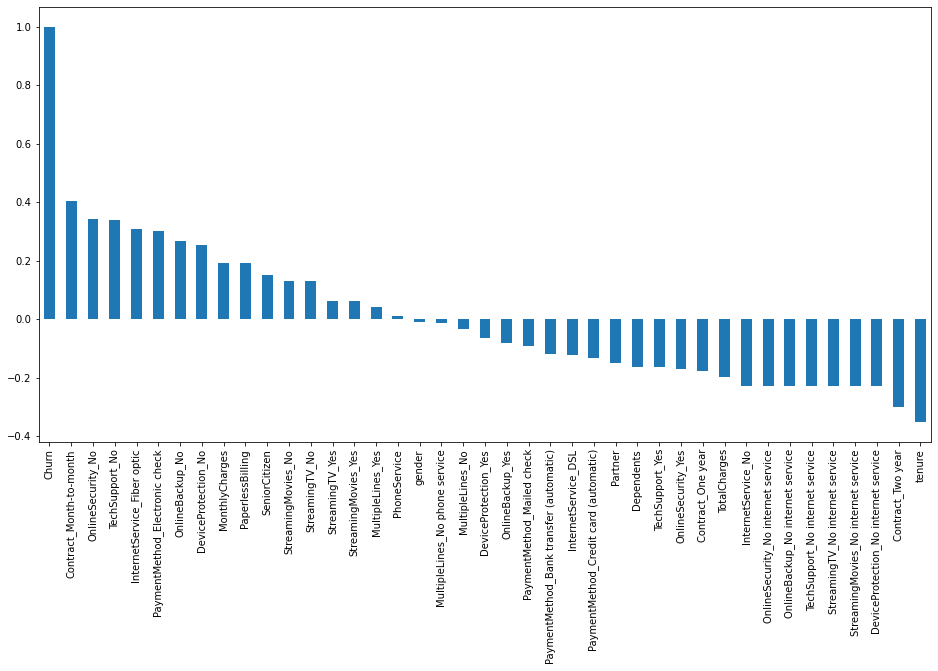

In [346]:
plt.figure(figsize=(16,8))
cat_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Drop features: gender, PhoneService, OnlineSecurity_No internet service, OnlineBackup_No internet service, DeviceProtection_No internet service, TechSupport_No internet service, StreamingTV_No internet service, StreamingMovies_No internet service**

In [347]:
to_drop = ['gender', 'PhoneService', 'OnlineSecurity_No internet service',
          'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
          'TechSupport_No internet service', 'StreamingTV_No internet service',
          'StreamingMovies_No internet service']
cat_df.drop(to_drop, inplace=True, axis=1)

In [348]:
target = cat_df['Churn'].values
columns = cat_df.columns.tolist()
columns.remove('Churn')
features = cat_df[columns].values

In [354]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3, stratify = target, random_state=1)

**Logistic Regression**

In [441]:
logreg = LogisticRegression(random_state=0)
logreg.fit(train_x, train_y)
logreg_prediction = logreg.predict(test_x)
accuracy_score(test_y, logreg_prediction)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8092759110269758

In [442]:
print("Logistic regression train accuracy: %0.4lf" %accuracy_score(train_y, logreg.predict(train_x)))
print("Logistic regression test accuracy: %0.4lf" %accuracy_score(test_y, logreg_prediction))

Logistic regression train accuracy: 0.8008
Logistic regression test accuracy: 0.8093


**Random forest**

In [415]:
rf = RandomForestClassifier(random_state = 1, criterion = 'gini')

rf_param_grid = {'n_estimators': [50, 100, 200, 250, 300, 1000],
                'max_depth': [50, 60, 70, 80, 90, 100, 110],
                'max_features': ['auto', 'log2']}
rf_gs = GridSearchCV(estimator = rf, param_grid = rf_param_grid, cv = 5,
                    scoring = 'accuracy', verbose = 1)


In [416]:
rf_gs.fit(train_x, train_y)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed: 11.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [50, 60, 70, 80, 90, 100, 110],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 200, 250, 300, 1000]},
             scoring='accuracy', verbose=1)

In [417]:
rf_gs.best_params_
best_rf = rf_gs.best_estimator_

In [426]:
rf_prediction = best_rf.predict(test_x)
accuracy_score(test_y, rf_prediction)

0.7879791765262659

In [427]:
print("Random forest train accuracy: %0.4lf" %accuracy_score(train_y, best_rf.predict(train_x)))
print("Random forest test accuracy: %0.4lf" %accuracy_score(test_y, rf_prediction))

Random forest train accuracy: 0.9976
Random forest test accuracy: 0.7880


**SVM**

In [402]:
svc = SVC(random_state = 1, kernel = 'rbf')
svc_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
svc_gs = GridSearchCV(estimator = svc, param_grid = svc_param_grid, cv =5,
                     scoring = 'accuracy', verbose = 1)
svc_gs.fit(train_x, train_y)

svc_gs.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


{'C': 1, 'gamma': 0.001}

In [428]:
best_svc = svc_gs.best_estimator_
svc_prediction = best_svc.predict(test_x)
accuracy_score(test_y, svc_prediction)

0.7960246095598675

In [429]:
print("SVC train accuracy: %0.4lf" %accuracy_score(train_y, best_svc.predict(train_x)))
print("SVC test accuracy: %0.4lf" %accuracy_score(test_y, svc_prediction))


SVC train accuracy: 0.8057
SVC test accuracy: 0.7960


In [443]:
logreg_auc = roc_auc_score(test_y, logreg_prediction)
rf_auc = roc_auc_score(test_y, rf_prediction)
svc_auc = roc_auc_score(test_y, svc_prediction)

print("Logistic regression AUC score: " + str(logreg_auc))
print("Random forest AUC score: " + str(rf_auc))
print("SVC AUC score: " + str(svc_auc))

Logistic regression AUC score: 0.7250468603561386
Random forest AUC score: 0.6917691162688131
SVC AUC score: 0.6750509950934451


In [444]:
logreg_f1 = f1_score(test_y, logreg_prediction)
rf_f1 = f1_score(test_y, rf_prediction)
svc_f1 = f1_score(test_y, svc_prediction)

print("Logistic regression F1 score: " + str(logreg_f1))
print("Random forest F1 score: " + str(rf_f1))
print("SVC F1 score: " + str(svc_f1))

Logistic regression F1 score: 0.6029556650246305
Random forest F1 score: 0.5492957746478873
SVC F1 score: 0.5205784204671857


In [445]:
confusion_matrix(test_y, logreg_prediction)

array([[1404,  148],
       [ 255,  306]])

In [446]:
print("Logistic regression precision: %0.4lf" %precision_score(test_y, logreg_prediction))
print("Logistic regression recall: %0.4lf" %recall_score(test_y, logreg_prediction))

Logistic regression precision: 0.6740
Logistic regression recall: 0.5455


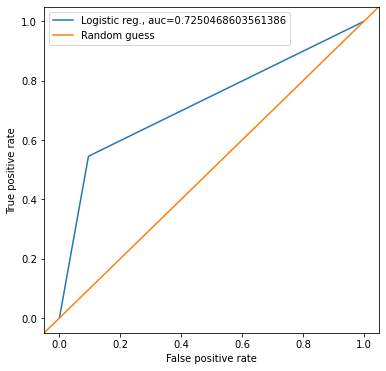

In [484]:
fpr, tpr, _ = roc_curve(test_y, logreg_prediction)

f, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr,tpr,label="Logistic reg., auc="+str(logreg_auc))
ax.plot([0,1], [0,1], transform = ax.transAxes, label = 'Random guess')
ax.legend(loc=4)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


(0.0, 1.0)

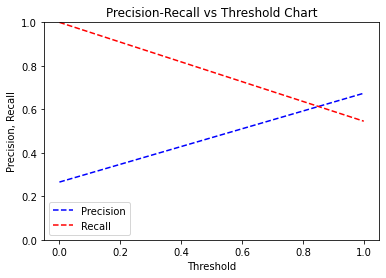

In [459]:
precision, recall, thresholds = precision_recall_curve(test_y, logreg_prediction) 

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

**Recall can be slightly improved by changing the threshold.**

**Based on analysis on the data, retention rate can be improved by e.g.**

**-Introducing family packages where a family subscribes together**

**-Give free trials or discounts for subscription of extra services for the first 3 months where churn rate > retention rate**

**-Introduce discounts or other benefits for annual subscription to attract monthly subscribers to subscribe annually**